In [4]:
import pandas as pd
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

In [5]:
df = pd.read_excel('/content/Sewer Sensor Data.xlsx')
df.head()

,Temperature,Humidity,Gas,Water
0,27.48,35.85,385,834
1,24.31,45.79,985,746
2,28.24,46.57,784,823
3,32.62,41.98,103,971
4,23.83,48.39,928,705


In [6]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
Gas,0
Water,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,Temperature,Humidity,Gas,Water
count,100.000000,100.00000,100.000000,100.000000
mean,24.480900,50.22320,554.670000,735.000000
std,4.541058,9.53672,308.727858,136.045744
min,11.900000,30.81000,4.000000,370.000000
25%,21.997500,41.94500,310.750000,661.750000
50%,24.365000,50.84500,627.000000,734.000000
75%,27.030000,55.38250,822.500000,820.750000
max,34.260000,77.20000,1005.000000,1024.000000


In [9]:
df.corr()

,Temperature,Humidity,Gas,Water
Temperature,1.000000,-0.136493,-0.067014,0.990473
Humidity,-0.136493,1.000000,0.200034,-0.156167
Gas,-0.067014,0.200034,1.000000,-0.043648
Water,0.990473,-0.156167,-0.043648,1.000000


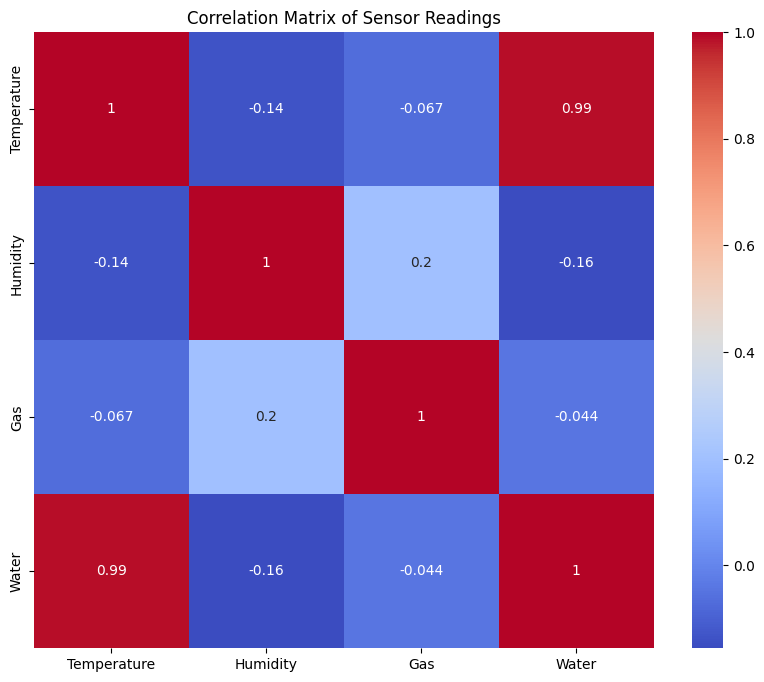

In [10]:
# Visualizing correlation using Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Sensor Readings')
plt.show()


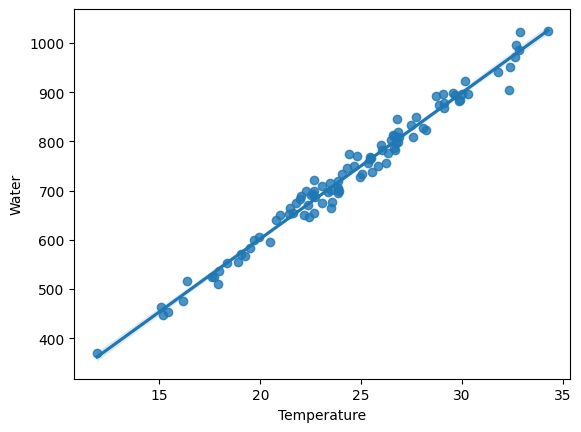

In [11]:
sns.regplot(x='Temperature',y='Water',data=df)
plt.show()

In [12]:
df1 = df.drop(columns = ['Humidity','Gas'])
print(df1)

    Temperature  Water
0         27.48    834
1         24.31    746
2         28.24    823
3         32.62    971
4         23.83    705
..          ...    ...
95        17.68    524
96        26.48    802
97        26.31    777
98        25.03    734
99        23.83    719

[100 rows x 2 columns]


In [13]:
x = df1.drop(columns = ['Water'])
print(x)

    Temperature
0         27.48
1         24.31
2         28.24
3         32.62
4         23.83
..          ...
95        17.68
96        26.48
97        26.31
98        25.03
99        23.83

[100 rows x 1 columns]


In [14]:
y = df['Water']
print(y)

0     834
1     746
2     823
3     971
4     705
     ... 
95    524
96    802
97    777
98    734
99    719
Name: Water, Length: 100, dtype: int64


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
model.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = model.predict(x_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
r2_score(y_test,y_pred)


0.9798217656697664

In [20]:
input_data = np.array([32.62])
input_data = input_data.reshape(1,-1)
prediction = model.predict(input_data)
print(prediction)

[976.64352719]
